In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import librosa

In [3]:
import librosa.display
import IPython.display as ipd

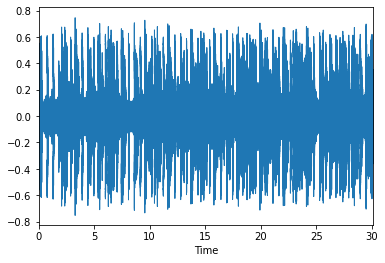

In [4]:
data , sample_rate = librosa.load('Data/genres_original/disco/disco.00000.wav')
librosa.display.waveplot(data ,sr=sample_rate)
ipd.Audio('Data/genres_original/disco/disco.00000.wav')

In [5]:
sample_rate

22050

# Feature Extraction
 

In [6]:
mfccs =  librosa.feature.mfcc(y=data , sr= sample_rate , n_mfcc = 40)
mfccs

array([[-1.22411781e+02, -1.31638947e+02, -1.12697815e+02, ...,
        -1.18416672e+02, -1.00066811e+02, -9.20564499e+01],
       [ 1.19853439e+02,  1.20825134e+02,  9.54793243e+01, ...,
         1.22320801e+02,  1.15113571e+02,  1.21486877e+02],
       [-4.56700058e+01, -4.58341560e+01, -1.98116112e+01, ...,
        -8.03375626e+00, -3.45572996e+00, -5.28529167e-01],
       ...,
       [ 2.79018426e+00, -4.75513935e-03,  5.45343637e-01, ...,
         1.40042698e+00,  2.24966049e+00,  9.76749837e-01],
       [ 9.41791534e-02, -1.86746597e+00, -6.67094898e+00, ...,
         5.59349632e+00,  6.98804951e+00,  5.53954172e+00],
       [-2.48536944e+00, -3.12349176e+00,  8.82822156e-01, ...,
        -2.48672104e+00, -5.27400374e-01, -1.48225188e+00]], dtype=float32)

In [7]:
mfccs.shape

(40, 1298)

In [8]:
def feature_extractor(file_name):
    audio,sample_rate = librosa.load(file_name ,res_type ='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc =40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [9]:
import os
import numpy as np

In [10]:
os.listdir('Data/genres_original')

['metal',
 'blues',
 'country',
 'reggae',
 'rock',
 'hiphop',
 'classical',
 'pop',
 'disco',
 'jazz']

In [11]:
Class = ['country',
 'jazz',
 'classical',
 'pop',
 'blues',
 'hiphop',
 'disco',
 'reggae',
 'rock',
 'metal']


In [12]:
Class.sort()

In [13]:
Class

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [14]:
data =[]
for i in Class:
    filepath = os.path.join('Data/genres_original',i)
    label  = i
    for audio in os.listdir(filepath):
        try:
            
            audiopath = os.path.join(filepath , audio)
            dataset = feature_extractor(audiopath)
            data.append([dataset,label])
        except:
            pass
                

/home/dhakad/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [15]:
len(data)

999

In [16]:
import random
random.shuffle(data)

In [17]:
 df = pd.DataFrame(data,columns = ['Feature','class'])
df.head()

,Feature,class
0,"[-88.32022, 105.42358, -24.499752, 41.84314, -...",rock
1,"[-260.39737, 180.65173, -15.385267, 48.5717, -...",jazz
2,"[-192.07294, 105.57014, -26.020508, 40.166473,...",jazz
3,"[-98.358635, 136.56776, -46.696262, 46.458588,...",rock
4,"[-243.7949, 123.336296, -15.565518, 38.895226,...",reggae


In [18]:
X = np.array(df['Feature'].to_list())
y = np.array(df['class'].to_list())

In [19]:
X.shape

(999, 40)

In [20]:
y.shape

(999,)

In [21]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [22]:
lenc = LabelEncoder()
y = to_categorical(lenc.fit_transform(y))

In [23]:
y.shape


(999, 10)

In [24]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size =0.1,random_state=52)

In [25]:
X_train.shape

(899, 40)

# Model Creation

In [26]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout ,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [27]:
num_labels  =y.shape[1]

In [28]:
num_labels

10

In [29]:
# model=Sequential()

# model.add(Dense(224,input_shape=(40,)))
# model.add(Activation('relu'))

# model.add(Dense(1024))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.4))

# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.1))

# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# model.add(Dense(100))
# model.add(Activation('relu'))


# ###final layer
# model.add(Dense(num_labels))
# model.add(Activation('softmax'))

In [30]:
# model=Sequential()

# model.add(Dense(100,input_shape=(40,)))
# model.add(Activation('relu'))

# model.add(Dense(200))
# model.add(Activation('relu'))

# model.add(Dense(250))
# model.add(Activation('relu'))

# model.add(Dense(200))
# model.add(Activation('relu'))

# model.add(Dense(150))
# model.add(Activation('relu'))

# model.add(Dense(100))
# model.add(Activation('relu'))


# ###final layer
# model.add(Dense(num_labels))
# model.add(Activation('softmax'))

In [35]:
model=Sequential()

model.add(Dense(224,input_shape=(40,)))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))


###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 224)               9184      
_________________________________________________________________
activation_7 (Activation)    (None, 224)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              230400    
_________________________________________________________________
activation_8 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_9 (Activation)    (None, 512)              

In [37]:
model.compile(loss='categorical_crossentropy',metrics =['accuracy'],optimizer='adam')

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/music_genre__classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
29/29 [==============================] - 1s 19ms/step - loss: 6.4182 - accuracy: 0.1099 - val_loss: 2.2296 - val_accuracy: 0.2200

Epoch 00001: val_loss improved from inf to 2.22955, saving model to saved_models/music_genre__classification.hdf5
Epoch 2/200
29/29 [==============================] - 0s 13ms/step - loss: 2.3695 - accuracy: 0.1856 - val_loss: 1.9752 - val_accuracy: 0.2800

Epoch 00002: val_loss improved from 2.22955 to 1.97523, saving model to saved_models/music_genre__classification.hdf5
Epoch 3/200
29/29 [==============================] - 0s 15ms/step - loss: 2.2447 - accuracy: 0.1933 - val_loss: 1.9541 - val_accuracy: 0.3300

Epoch 00003: val_loss improved from 1.97523 to 1.95412, saving model to saved_models/music_genre__classification.hdf5
Epoch 4/200
29/29 [==============================] - 0s 14ms/step - loss: 2.0665 - accuracy: 0.2315 - val_loss: 1.8547 - val_accuracy: 0.2700

Epoch 00004: val_loss improved from 1.95412 to 1.85469, saving model to saved_


Epoch 00037: val_loss did not improve from 0.98622
Epoch 38/200
29/29 [==============================] - 0s 14ms/step - loss: 0.7572 - accuracy: 0.7223 - val_loss: 1.0338 - val_accuracy: 0.6800

Epoch 00038: val_loss did not improve from 0.98622
Epoch 39/200
29/29 [==============================] - 0s 14ms/step - loss: 0.6661 - accuracy: 0.7657 - val_loss: 1.0260 - val_accuracy: 0.6700

Epoch 00039: val_loss did not improve from 0.98622
Epoch 40/200
29/29 [==============================] - 0s 16ms/step - loss: 0.6844 - accuracy: 0.7479 - val_loss: 1.2306 - val_accuracy: 0.6500

Epoch 00040: val_loss did not improve from 0.98622
Epoch 41/200
29/29 [==============================] - 0s 14ms/step - loss: 0.6477 - accuracy: 0.7918 - val_loss: 1.1316 - val_accuracy: 0.6800

Epoch 00041: val_loss did not improve from 0.98622
Epoch 42/200
29/29 [==============================] - 0s 14ms/step - loss: 0.6769 - accuracy: 0.7725 - val_loss: 1.1747 - val_accuracy: 0.6400

Epoch 00042: val_loss di

29/29 [==============================] - 0s 13ms/step - loss: 0.1169 - accuracy: 0.9687 - val_loss: 1.4943 - val_accuracy: 0.7500

Epoch 00080: val_loss did not improve from 0.98622
Epoch 81/200
29/29 [==============================] - 0s 14ms/step - loss: 0.1579 - accuracy: 0.9611 - val_loss: 1.6524 - val_accuracy: 0.7200

Epoch 00081: val_loss did not improve from 0.98622
Epoch 82/200
29/29 [==============================] - 0s 13ms/step - loss: 0.2490 - accuracy: 0.9241 - val_loss: 1.5847 - val_accuracy: 0.6800

Epoch 00082: val_loss did not improve from 0.98622
Epoch 83/200
29/29 [==============================] - 0s 14ms/step - loss: 0.2879 - accuracy: 0.9199 - val_loss: 1.2512 - val_accuracy: 0.7100

Epoch 00083: val_loss did not improve from 0.98622
Epoch 84/200
29/29 [==============================] - 0s 13ms/step - loss: 0.1691 - accuracy: 0.9431 - val_loss: 1.5688 - val_accuracy: 0.7200

Epoch 00084: val_loss did not improve from 0.98622
Epoch 85/200
29/29 [==================

29/29 [==============================] - 0s 14ms/step - loss: 0.0760 - accuracy: 0.9823 - val_loss: 1.7718 - val_accuracy: 0.7000

Epoch 00122: val_loss did not improve from 0.98622
Epoch 123/200
29/29 [==============================] - 0s 14ms/step - loss: 0.1616 - accuracy: 0.9712 - val_loss: 1.3935 - val_accuracy: 0.7200

Epoch 00123: val_loss did not improve from 0.98622
Epoch 124/200
29/29 [==============================] - 0s 14ms/step - loss: 0.0955 - accuracy: 0.9707 - val_loss: 1.3825 - val_accuracy: 0.7600

Epoch 00124: val_loss did not improve from 0.98622
Epoch 125/200
29/29 [==============================] - 0s 13ms/step - loss: 0.1421 - accuracy: 0.9638 - val_loss: 1.4331 - val_accuracy: 0.7200

Epoch 00125: val_loss did not improve from 0.98622
Epoch 126/200
29/29 [==============================] - 0s 13ms/step - loss: 0.0565 - accuracy: 0.9845 - val_loss: 1.6880 - val_accuracy: 0.7100

Epoch 00126: val_loss did not improve from 0.98622
Epoch 127/200
29/29 [=============

29/29 [==============================] - 0s 14ms/step - loss: 0.1737 - accuracy: 0.9623 - val_loss: 1.7456 - val_accuracy: 0.7300

Epoch 00164: val_loss did not improve from 0.98622
Epoch 165/200
29/29 [==============================] - 0s 14ms/step - loss: 0.1458 - accuracy: 0.9694 - val_loss: 1.5820 - val_accuracy: 0.7200

Epoch 00165: val_loss did not improve from 0.98622
Epoch 166/200
29/29 [==============================] - 0s 14ms/step - loss: 0.0490 - accuracy: 0.9872 - val_loss: 1.6468 - val_accuracy: 0.7200

Epoch 00166: val_loss did not improve from 0.98622
Epoch 167/200
29/29 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.9903 - val_loss: 1.8799 - val_accuracy: 0.7500

Epoch 00167: val_loss did not improve from 0.98622
Epoch 168/200
29/29 [==============================] - 0s 14ms/step - loss: 0.0695 - accuracy: 0.9798 - val_loss: 1.9491 - val_accuracy: 0.7400

Epoch 00168: val_loss did not improve from 0.98622
Epoch 169/200
29/29 [=============

In [42]:
model.save("music_generation_classification_model.h5")

In [39]:
y_pred =model.predict(X_test)
y_pred

array([[7.13616618e-15, 1.16492185e-20, 1.00000000e+00, 9.90734237e-18,
        2.51029811e-17, 1.10413143e-17, 1.24312258e-34, 5.91771437e-15,
        1.14855987e-13, 1.25856033e-16],
       [4.51394662e-05, 4.98973304e-06, 1.18378419e-04, 9.97243762e-01,
        1.09697168e-03, 9.52435857e-06, 6.50035872e-06, 4.42163509e-05,
        7.87932368e-06, 1.42260245e-03],
       [9.16801866e-07, 1.02899662e-06, 1.93953542e-06, 9.99545991e-01,
        4.45303216e-04, 4.29635350e-07, 2.42817123e-07, 1.17007949e-06,
        1.85091977e-07, 2.78455605e-06],
       [1.45181315e-02, 3.64745362e-03, 9.44453850e-03, 1.40033498e-01,
        7.40067899e-01, 6.72608055e-03, 7.91848265e-03, 4.71119955e-03,
        2.74625123e-02, 4.54702973e-02],
       [2.94068265e-19, 1.24101225e-22, 2.12837638e-23, 5.49318775e-18,
        1.00000000e+00, 8.66712405e-25, 1.42536047e-20, 1.18343582e-24,
        4.93769874e-18, 1.61470777e-20],
       [5.36246893e-22, 1.00000000e+00, 9.40972210e-18, 2.27663900e-23,
   

In [40]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7599999904632568


In [41]:
filename="Data/genres_original/disco/disco.00000.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = lenc.inverse_transform(predicted_label) 
prediction_class


[-111.0967       94.02796      12.417175     16.642748      8.123975
   15.666401     -1.4119718     7.022715      0.97305274   -1.4942188
   -3.08572      -5.098383     -3.7134497     0.22668457   -2.1035185
   -1.8155715    -5.322057      1.239463     -5.596891     -3.5927186
   -5.378745     -1.518877     -2.8262587     0.9849801    -2.295024
    0.94019324   -3.4648542    -1.1618254    -3.392729     -1.5046077
   -2.9029171    -3.3865848    -0.9524484     0.29164085    2.682701
    5.051681     -0.52711105   -0.6440341     0.71831745    0.4974173 ]
[[-111.0967       94.02796      12.417175     16.642748      8.123975
    15.666401     -1.4119718     7.022715      0.97305274   -1.4942188
    -3.08572      -5.098383     -3.7134497     0.22668457   -2.1035185
    -1.8155715    -5.322057      1.239463     -5.596891     -3.5927186
    -5.378745     -1.518877     -2.8262587     0.9849801    -2.295024
     0.94019324   -3.4648542    -1.1618254    -3.392729     -1.5046077
    -2.9029171   

/home/dhakad/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['disco'], dtype='<U9')